In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [178]:
tickers = ['^TNX',"^GSPC","UVXY","^VIX", "^DJI","^IXIC","KRE", "KGC","QQQ"]

In [179]:
df = pd.DataFrame()

In [180]:
for t in tickers:
    df[t] = web.DataReader(t, data_source="yahoo", start ="2020-1-1")["Adj Close"]

In [181]:
df.corr()

,^TNX,^GSPC,UVXY,^VIX,^DJI,^IXIC,KRE,KGC,QQQ
^TNX,1.000000,0.305889,-0.443396,-0.433593,0.474882,0.066702,0.780674,-0.567788,-0.010847
^GSPC,0.305889,1.000000,-0.884838,-0.712534,0.972513,0.953401,0.762243,0.460612,0.932710
UVXY,-0.443396,-0.884838,1.000000,0.891345,-0.937104,-0.741555,-0.736426,-0.359481,-0.712509
^VIX,-0.433593,-0.712534,0.891345,1.000000,-0.794844,-0.538297,-0.597895,-0.300422,-0.512374
^DJI,0.474882,0.972513,-0.937104,-0.794844,1.000000,0.859012,0.839303,0.321412,0.825839
^IXIC,0.066702,0.953401,-0.741555,-0.538297,0.859012,1.000000,0.606557,0.586184,0.995776
KRE,0.780674,0.762243,-0.736426,-0.597895,0.839303,0.606557,1.000000,-0.181616,0.535177
KGC,-0.567788,0.460612,-0.359481,-0.300422,0.321412,0.586184,-0.181616,1.000000,0.645865
QQQ,-0.010847,0.932710,-0.712509,-0.512374,0.825839,0.995776,0.535177,0.645865,1.000000


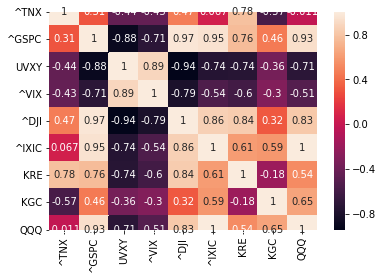

In [182]:
sns.heatmap(df.corr(), annot=True)

## Getting Daily returns for each column 

In [183]:
for x in df.columns:
    df[f"{x} returns"] = df[f"{x}"].pct_change()

##  Coortation Analysis 
- Appears that the capital markets re coorelated to the 10 Year Yield
- Volatlity and Gold s inversly coorelated to the 10 year
- Lets see what indicatiors we can discover in the data

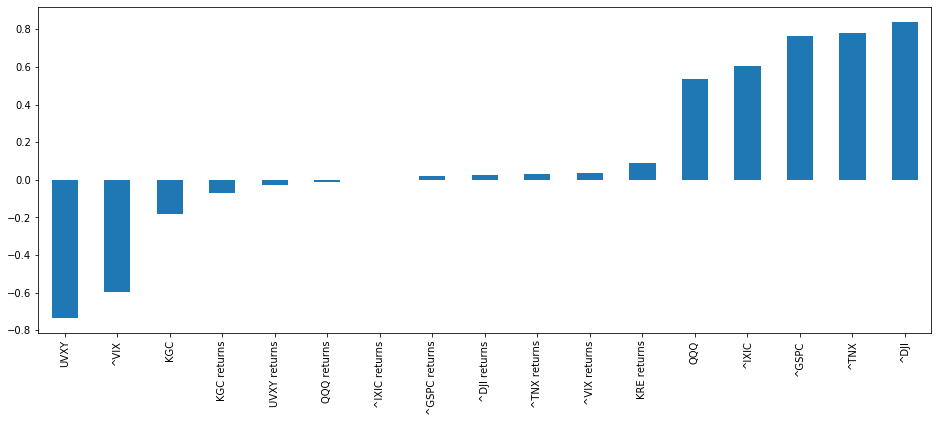

In [184]:
df.corrwith(df["KRE"]).sort_values()[:-1].plot(kind = "bar", figsize = (16,6))

Text(0, 0.5, 'UVXY')

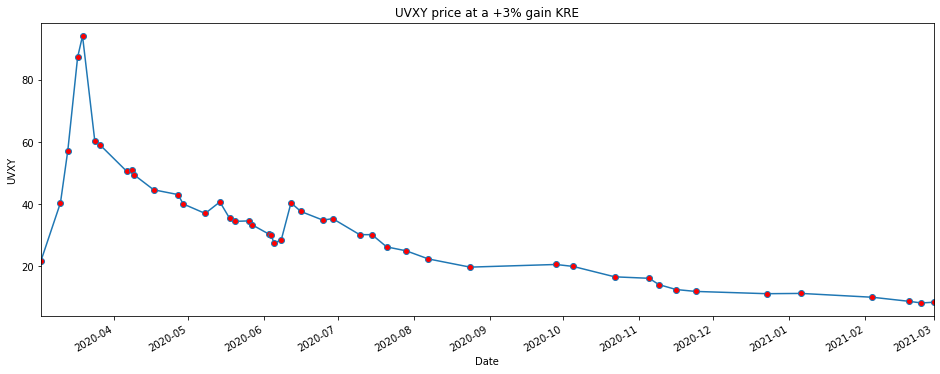

In [185]:
df[df["KRE returns"] *  100 > 3]["UVXY"].plot(figsize = (16,6), marker = "o", mfc = "r")
plt.title("UVXY price at a +3% gain KRE")
plt.ylabel("UVXY")

Text(0, 0.5, 'KRE')

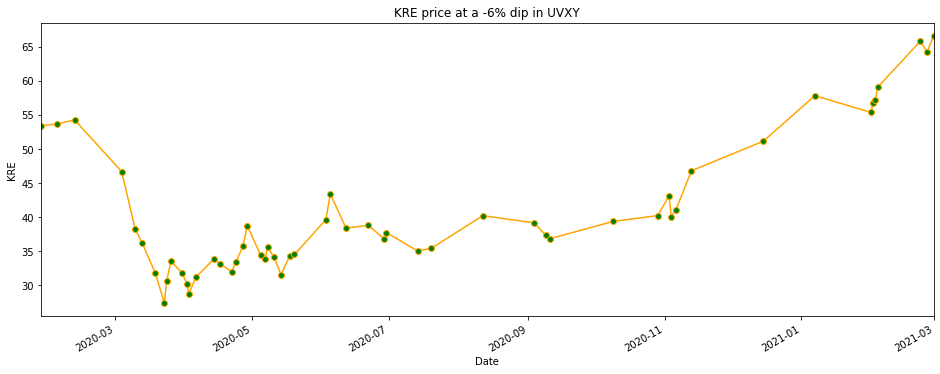

In [186]:
df[df["UVXY returns"] *  100 < -6]["KRE"].plot(figsize = (16,6), marker = "o", mfc = "g", c ="orange")
plt.title("KRE price at a -6% dip in UVXY")
plt.ylabel("KRE")

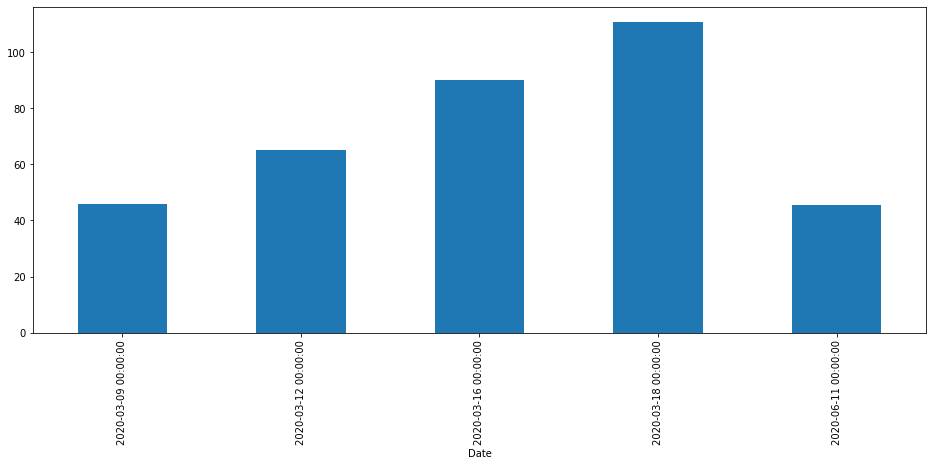

In [187]:
df[df["KRE returns"] *  100 < -8]["UVXY"].plot(kind = "bar", figsize = (16,6))

In [154]:
df[df["KRE returns"] *  100 < -8]["UVXY returns"]

Date
2020-03-09    0.368311
2020-03-12    0.348403
2020-03-16    0.574773
2020-03-18    0.268256
2020-06-11    0.501648
Name: UVXY returns, dtype: float64

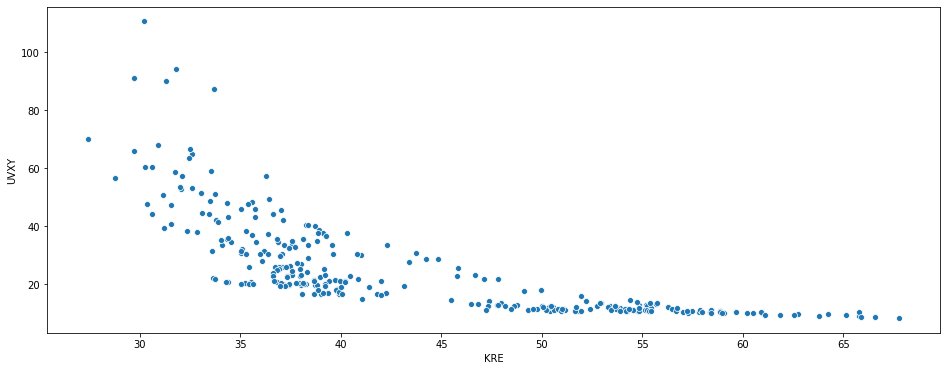

In [121]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df["KRE"], y = df["UVXY"])

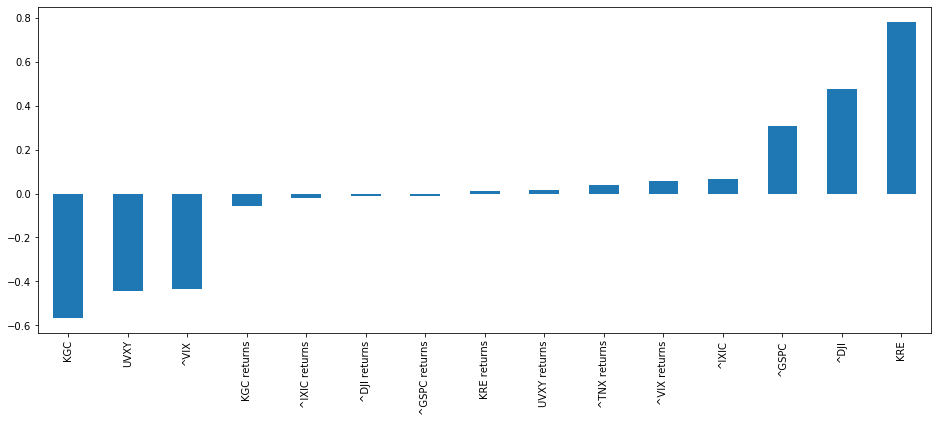

In [125]:
df.corrwith(df["^TNX"]).sort_values()[:-1].plot(figsize = (16,6), kind = "bar")

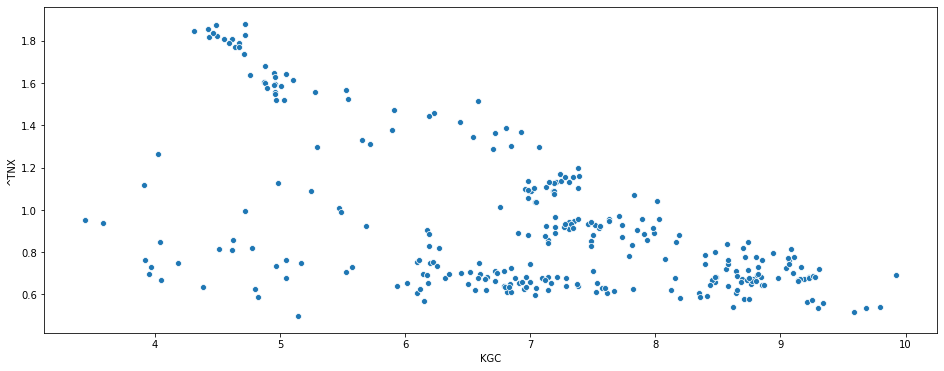

In [129]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df["KGC"], y = df["^TNX"])

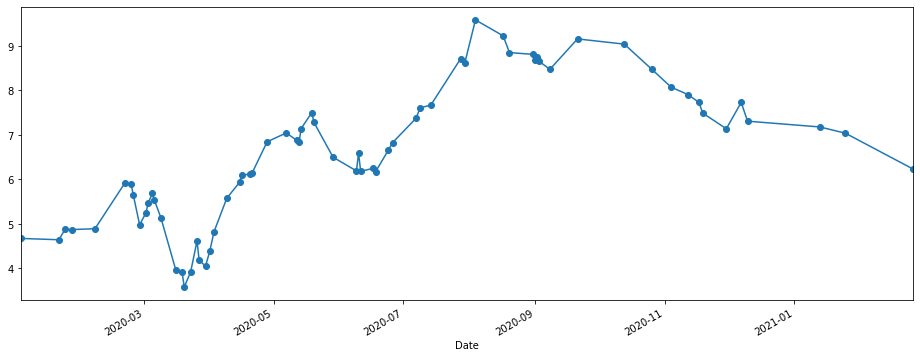

In [177]:
df[df["^TNX returns"] * 100 < -3]["KGC"].plot(figsize= (16,6), marker = "o")